## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Target variable for model: IS_SUCCESSFUL: 1 is considered yes (successful) and 0 is considered no (not successful)

# Feature variables for model: 9 features: (APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, STATUS, INCOME_AMT, SPECIAL_CONSIDERATIONS, ASK_AMT)

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

# Attempt #1

APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 9 : activation function = relu
<br>
layer2 = 18 : activation function = relu

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 396       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 19        
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Convert y_train variable into a numpy array
# Added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

2023-02-19 20:58:00.753088: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
804/804 [==============================] - 4s 2ms/step - loss: 0.5900 - accuracy: 0.7119
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7252
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5573 - accuracy: 0.7276
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5555 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7307
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.7307
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7313
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7312
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7310
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5504 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7364
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7365
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.7360
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7371
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7369
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.7367
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5423 - accuracy: 0.7370
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7358
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5424 - accuracy: 0.7362
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5542 - accuracy: 0.7254
Loss: 0.5541958808898926, Accuracy: 0.7253644466400146


<AxesSubplot:>

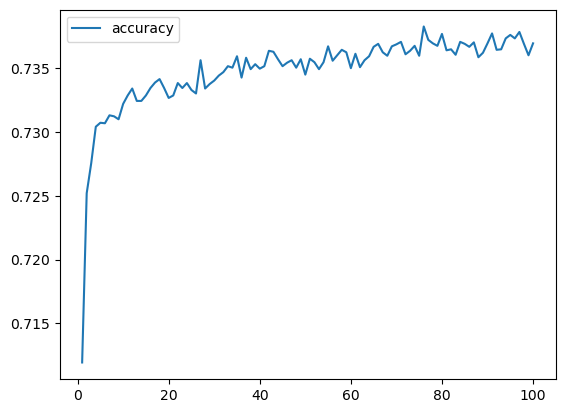

In [16]:
# Plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [17]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity1.h5')

# RESULTS:
<br>
Attempt #1
<br>
APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 9 : activation function = relu
<br>
layer2 = 18 : activation function = relu
<br>
<br>
Loss: 0.5536191259042167, Accuracy: 0.727580189704895
<br>
Since there is a loss value of 55, this indicates that the model can be further optimized.
<br>
The accuracy percent indicates that 72% of the model's predicted values align with the true values in the original dataset.
<br>
Some changes need to be made in order to get to 75% accuracy.
<br>
The following variables were also run through this model:
<br>
<br>
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 12
layer2 = 24
<br>
Loss: 0.5522796763553564, Accuracy: 0.7250145673751831
<br>
<br>
APPLICATION_TYPE cutoff = 800
<br>
CLASSIFICATION cutoff = 1000
<br>
layer1 = 12
<br>
layer2 = 24
<br>
<br>
Loss: 0.5575985619278065, Accuracy: 0.7231487035751343

# Attempt #2 - adding a hidden layer
<br>
APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 9 : activation function = relu
<br>
layer2 = 18 : activation function = relu
<br>
layer3 = 27 : activation function = relu

In [18]:
# Define model - deep neural net, i.e., number of input features and hidden nodes for each layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# 1st hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# 2nd hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# 3rd hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 396       
_________________________________________________________________
dense_4 (Dense)              (None, 18)                180       
_________________________________________________________________
dense_5 (Dense)              (None, 27)                513       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 28        
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Converting y_train variable into numpy array
# Added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5958 - accuracy: 0.7002
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5597 - accuracy: 0.7278
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5551 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7295
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7328
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7322
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5483 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7379
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5412 - accuracy: 0.7368
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7380
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5413 - accuracy: 0.7374
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.7386
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5413 - accuracy: 0.7366
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5412 - accuracy: 0.7372
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.7376
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7378
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 

In [22]:
# Evaluate model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5517 - accuracy: 0.7268
Loss: 0.5517257452011108, Accuracy: 0.7267638444900513


<AxesSubplot:>

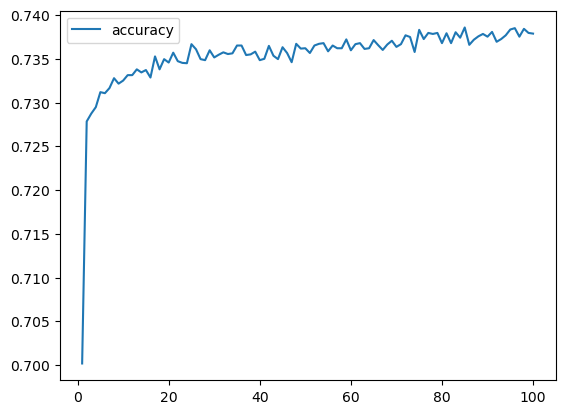

In [23]:
# Plotting accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [24]:
# Export model to HDF5 file
nn.save('Models/AlphabetSoupCharity2.h5')

RESULTS:
<br>
Attempt #2
<br>
APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 9 : activation function = relu
<br>
layer2 = 18 : activation function = relu
<br>
layer3 = 27 : activation function = relu
<br>
<br>
Loss: 0.5541777287836325, Accuracy: 0.7258309125900269
<br>
<br>
A loss value of 55 shows that the model can be further optimized.
<br>
The accuracy percent displays that 72% of the model's predicted values align with the true values of the original dataset.
<br>
<br>
The model is still not at 75% accuracy.
<br>
<br>
The following variables were also run through this model:
<br>
<br>
APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 12
<br>
layer2 = 24
<br>
layer3 = 36
<br>
<br>
Loss: 0.5545361445735565, Accuracy: 0.7241982221603394
<br>
<br>
APPLICATION_TYPE cutoff = 800
<br>
CLASSIFICATION cutoff = 1000
<br>
layer1 = 12
<br>
layer2 = 24
<br>
layer3 = 36
<br>
<br>
Loss: 0.5560268456039207, Accuracy: 0.7268804907798767

# Attempt #3 - changing activation functions
<br>
APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 9 : activation function = relu
<br>
layer2 = 18 : activation function = tanh
<br>
layer3 = 27 : activation function = tanh

In [25]:
# Define model - deep neural net, i.e., number of input features and hidden nodes for each layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# 1st hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# 2nd hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# 3rd hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 9)                 396       
_________________________________________________________________
dense_8 (Dense)              (None, 18)                180       
_________________________________________________________________
dense_9 (Dense)              (None, 27)                513       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 28        
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Converted y_train variable into numpy array
# Added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5775 - accuracy: 0.7158
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5582 - accuracy: 0.7294
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7302
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7323
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7325
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7331
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7327
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5413 - accuracy: 0.7366
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5413 - accuracy: 0.7376
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5409 - accuracy: 0.7367
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7366
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7364
Epoch 86/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5405 - accuracy: 0.7363
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.7366
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7365
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5407 - accuracy: 0.7368
Epoch 90/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5410 - accuracy: 

In [29]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5512 - accuracy: 0.7259
Loss: 0.5512014031410217, Accuracy: 0.7259474992752075


<AxesSubplot:>

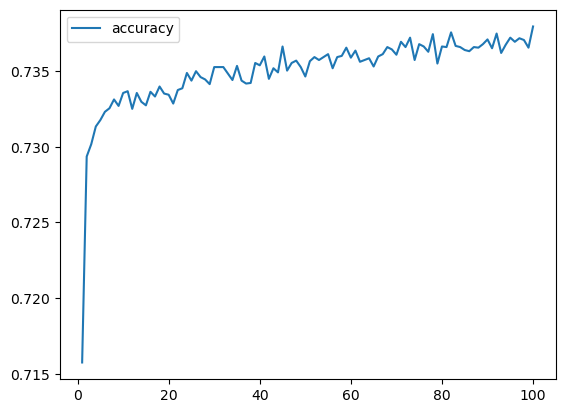

In [30]:
# Plotting accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [31]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity3.h5')

RESULTS:
<br>
<br>
Attempt #3
<br>
APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 9 : activation function = relu
<br>
layer2 = 18 : activation function = tanh
<br>
layer3 = 27 : activation function = tanh
<br>
<br>
Loss: 0.5513413424950647, Accuracy: 0.7266472578048706
<br>
<br>
A loss value of 55 shows that the model can be further optimized.
<br>
The accuracy percent displays that 72% of the model's predicted values align with the true values in the original dataset.
<br>
<br>
The model is still not at 75% accuracy.
<br>
<br>
The following variables were also run through this model:
<br>
<br>
APPLICATION_TYPE cutoff = 600
<br>
CLASSIFICATION cutoff = 300
<br>
layer1 = 12
<br>
layer2 = 24
<br>
layer3 = 36
<br>
<br>
Loss: 0.5520951250065173, Accuracy: 0.7255976796150208
<br>
<br>
APPLICATION_TYPE cutoff = 800
<br>
CLASSIFICATION cutoff = 1000
<br>
layer1 = 12
<br>
layer2 = 24
<br>
layer3 = 36
<br>
<br>
Loss: 0.555375917367963, Accuracy: 0.7251312136650085